# Eddy Occurances in the Delaware Bay for August 2023
Created by Matthew Learn<br>
Based on Jupyter notebook by Charlotte Bramich <br>
Water level data from NOAA Station 8536110 in Cape May, New Jersey. Link: https://tidesandcurrents.noaa.gov/stationhome.html?id=8536110<br>
Eddy occurance data taken from Rutgers University Center for Ocean Observing Leadership High Frequency Radar Data. Link: https://marine.rutgers.edu/~hroarty/maracoos/total_viewer/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wl_fname = 'CO-OPS_8536110_wl.csv' # name of the water level file
eo_fname = 'Del_Bay_Eddies2023-08.xlsx' # name of the eddy occurance file

## Data Processing

#### Data wrangling for water level data

In [3]:
wl = pd.read_csv(wl_fname, usecols=['Date','Time (GMT)', 'Verified (ft)']) # Read in water level data
wl['Date'] = pd.to_datetime(wl['Date'] + ' ' + wl['Time (GMT)']) # Set Date and Time columns to DateTime and add to new column
wl['Verified (m)'] = wl['Verified (ft)'] / 3.281 # Convert water level to meters and set to new variable
wl = wl.drop(['Time (GMT)', 'Verified (ft)'],axis=1) # Drop old columns
wl = wl.set_index('Date') # Set the index to date

wl.head()


,Verified (m)
Date,
2023-08-01 00:00:00,2.157879
2023-08-01 01:00:00,2.069491
2023-08-01 02:00:00,1.776897
2023-08-01 03:00:00,1.338007
2023-08-01 04:00:00,0.889973


#### Read in eddy occurance data

In [4]:
eo_xl = pd.read_excel(eo_fname, skiprows=1, header=1, names=['Date','isEddy'], index_col='Date', parse_dates=['Date'])

eo_xl.head()


,isEddy
Date,
2023-08-01 00:00:00,0.0
2023-08-01 01:00:00,0.0
2023-08-01 02:00:00,0.0
2023-08-01 03:00:00,0.0
2023-08-01 04:00:00,0.0


#### Get dates and water levels of all eddy occurances

In [5]:
eo = pd.merge(wl, eo_xl, how = 'outer', left_index = True, right_index = True) # Merge the two datasets into a new dataset
eo = eo[eo['isEddy'] == 1] # Keep only the rows with eddy occurances

eo.head()


,Verified (m),isEddy
Date,,
2023-08-01 08:00:00,0.240780,1.0
2023-08-01 14:00:00,1.533069,1.0
2023-08-03 09:00:00,0.042670,1.0
2023-08-03 11:00:00,0.627857,1.0
2023-08-03 21:00:00,0.057909,1.0


## Ploting

#### Plot of entire month

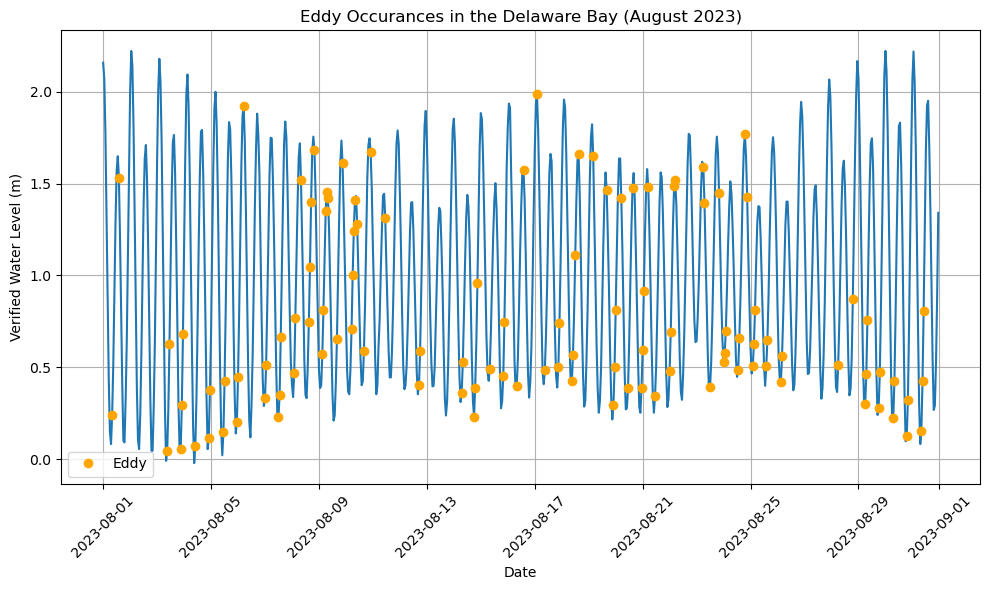

In [21]:
plt.figure(figsize=(10,6))

plt.plot(wl['Verified (m)'])
plt.plot(eo.index, eo['Verified (m)'], linestyle = 'None', marker = 'o', color = 'orange', label = 'Eddy')

plt.title('Eddy Occurances in the Delaware Bay (August 2023)')
plt.xlabel('Date')
plt.ylabel('Verified Water Level (m)')

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()


#### ~10 Day Extent

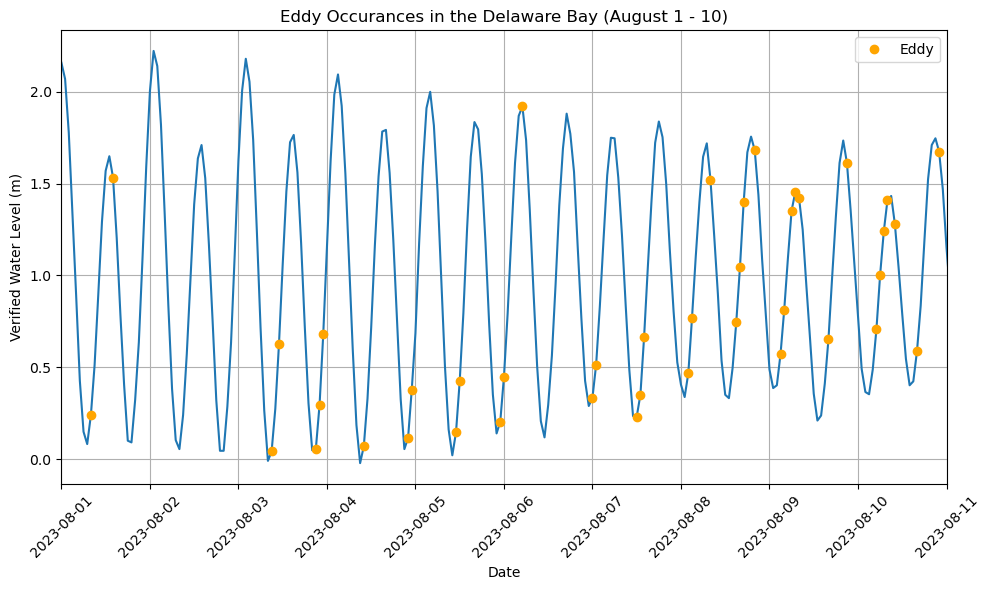

In [24]:
plt.figure(figsize=(10,6))

plt.plot(wl['Verified (m)'])
plt.plot(eo.index, eo['Verified (m)'], linestyle = 'None', marker = 'o', color = 'orange', label = 'Eddy')

plt.xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2023-08-11'))

plt.title('Eddy Occurances in the Delaware Bay (August 1 - 10)')
plt.xlabel('Date')
plt.ylabel('Verified Water Level (m)')

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()


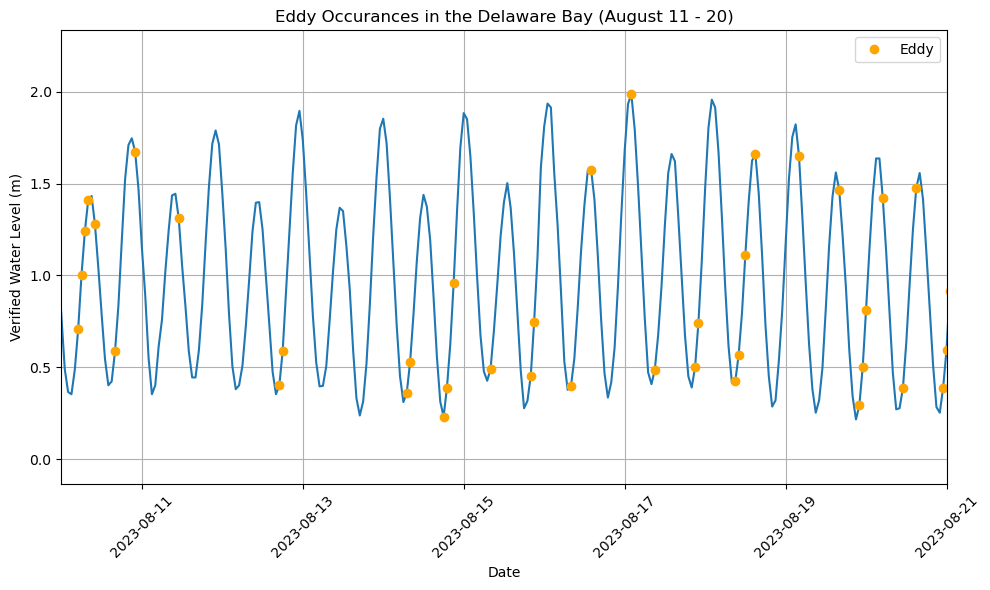

In [23]:
plt.figure(figsize=(10,6))

plt.plot(wl['Verified (m)'])
plt.plot(eo.index, eo['Verified (m)'], linestyle = 'None', marker = 'o', color = 'orange', label = 'Eddy')

plt.xlim(pd.Timestamp('2023-08-10'), pd.Timestamp('2023-08-21'))

plt.title('Eddy Occurances in the Delaware Bay (August 11 - 20)')
plt.xlabel('Date')
plt.ylabel('Verified Water Level (m)')

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()


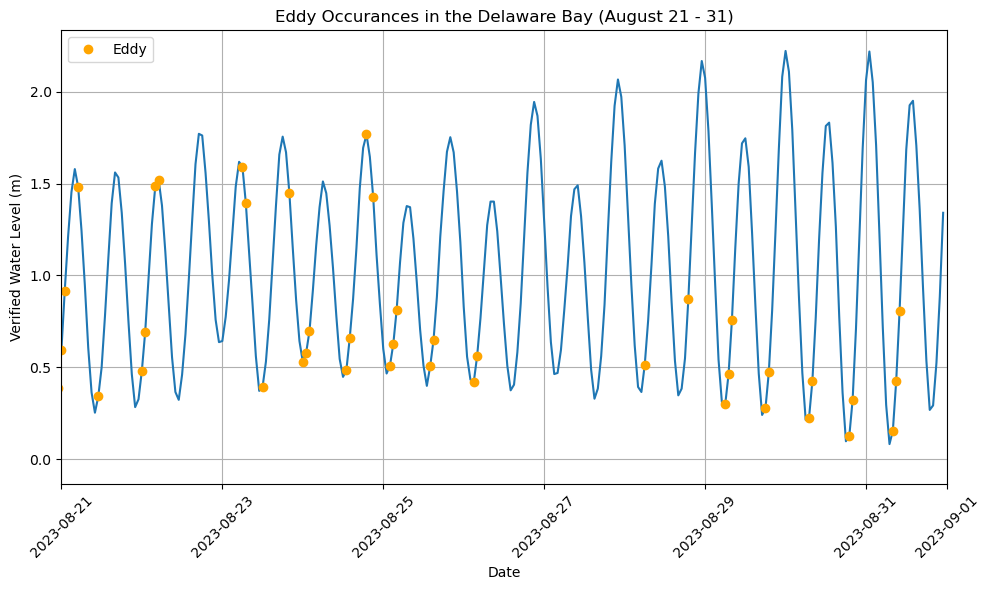

In [25]:
plt.figure(figsize=(10,6))

plt.plot(wl['Verified (m)'])
plt.plot(eo.index, eo['Verified (m)'], linestyle = 'None', marker = 'o', color = 'orange', label = 'Eddy')

plt.xlim(pd.Timestamp('2023-08-21'), pd.Timestamp('2023-09-01'))

plt.title('Eddy Occurances in the Delaware Bay (August 21 - 31)')
plt.xlabel('Date')
plt.ylabel('Verified Water Level (m)')

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()
